In [447]:
from scipy.stats import gamma
from scipy.integrate import quad

In [448]:
import numpy as np

def gamma_conv_pdf(z, points_amt=50):
    points = np.linspace(1e-8, z, points_amt)
    a_points = points[0:points_amt - 1]
    b_points = points[1:points_amt]
    integrand = lambda x: gamma.pdf(x, a=10, scale=200) * gamma.pdf(z / x, a=10, scale=200) * (1 / np.abs(x))
    result = np.sum([quad(integrand, a, b, epsabs=1e-3)[0] for a, b in zip(a_points, b_points)])
    
    return result

In [449]:
x = np.linspace(1, 10_000_000, 200)
y = [gamma_conv_pdf(x_) for x_ in x]

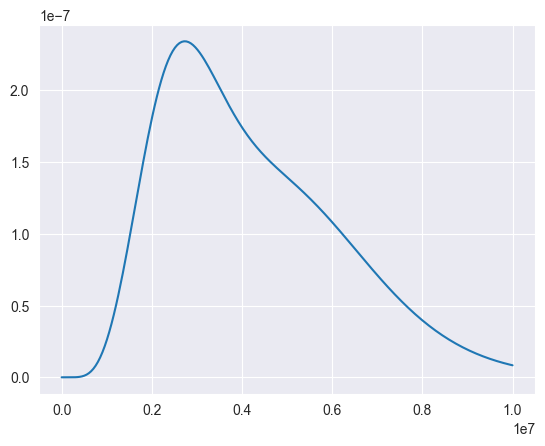

In [450]:
import matplotlib.pyplot as plt

plt.plot(x, y)

In [451]:
quad(gamma_conv_pdf, 0.001, 100_000_000, points=[0], epsabs=1e-3)

(0.9999166338605424, 0.0003565260500227041)